In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal

In [14]:
def kernel(xa, xb, amp, ll):
    Xa, Xb = get_tiled(xa, xb)
    C = amp**2 * np.exp(-0.5 * 1./ll**2 * (Xa - Xb)**2 )
    return C

def get_tiled(xa, xb):
    m, n = len(xa), len(xb)
    xa, xb = xa.reshape(m,1) , xb.reshape(n,1)
    Xa = np.tile(xa, (1, n))
    Xb = np.tile(xb.T, (m, 1))
    return Xa, Xb

In [22]:
X = np.linspace(-2, 2, 100)

In [35]:
amp , ll = 1.0 , 0.2
mu = np.zeros_like(X)
Kxx = kernel(X, X, amp, ll)

# First layer
layer_1 = multivariate_normal(mu, Kxx, allow_singular=True)
h_1 = layer_1.rvs(10)

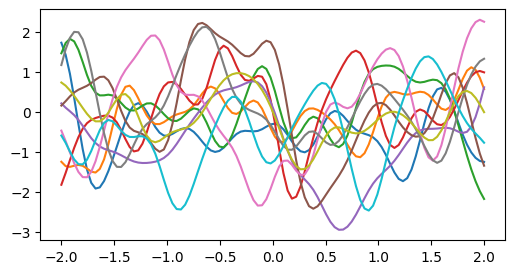

In [36]:
fig = plt.figure(figsize=(6,3))
plt.plot(X, h_1.T)
plt.show()

In [37]:
# Second layer
U1 = layer_1.rvs(1)
Kuu = kernel(U1, U1, amp, ll)
layer_2 = multivariate_normal(mu, Kuu, allow_singular=True)

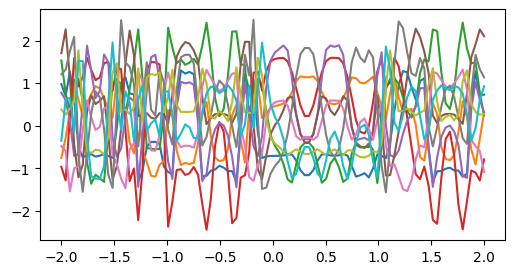

In [38]:
fig = plt.figure(figsize=(6,3))
plt.plot(X, layer_2.rvs(10).T)
plt.show()

In [39]:
# Third layer
U2 = layer_2.rvs(1)
Kvv = kernel(U2, U2, amp, ll)
layer_3 = multivariate_normal(mu, Kvv, allow_singular=True)

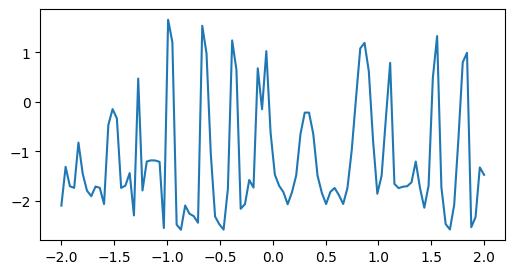

In [40]:
fig = plt.figure(figsize=(6,3))
plt.plot(X, layer_3.rvs(1).T)
plt.show()